In [1]:
#Sort data by ell and pull out sets of a, dist from end =min(a-1, g-b)
#returns list of lists of the form [ell, [a values for ell], [corresponding dist values for ell]]
#data_list must be a list output by Big Gonality 3 Calculator from the Calculators folder
def extract_data_for_plot(data_list):  
    ell_sort_data=sorted(data_list, key=lambda d: d['ell']) 

    #initialize values/lists
    ell_value=Integer(ell_sort_data[0]["ell"])
    a_list=[]
    dist_list=[]
    data_for_plot=[]
    genus=Integer(ell_sort_data[0]["genus"])
    
    #loop data
    for data_item in ell_sort_data:
        l=Integer(data_item["ell"])
        #compute items to plot
        a=Integer(data_item["ak"])
        dist=min(a-1,Integer(data_item["genus"])-Integer(data_item["bk"]))
        #combine all data with same ell
        if l==ell_value:
            a_list.append(a)
            dist_list.append(dist)
        else: #current data item has larger ell
            #append previous ell data to big list
            data_for_plot.append([ell_value,a_list,dist_list])
        
            #update ell value, reset lists, and include current item
            ell_value=l
            a_list=[a]
            dist_list=[dist]

    data_for_plot.append([ell_value,a_list,dist_list])

    return(data_for_plot, genus)

In [2]:
#plot data from extract_data_for_plot

def plot_data(data):
    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = (18,10)
    ell_list=[]
              
    data_for_plot,genus=extract_data_for_plot(data)
    title="Genus "+str(genus)
    plt.gca().set_title(title)
    
    for ell_data in data_for_plot:
        if ell_data[0] not in ell_list:
            ell_list.append("ell="+str(ell_data[0]))
        plt.plot(ell_data[1],ell_data[2],marker='o')
              
    plt.legend(ell_list)

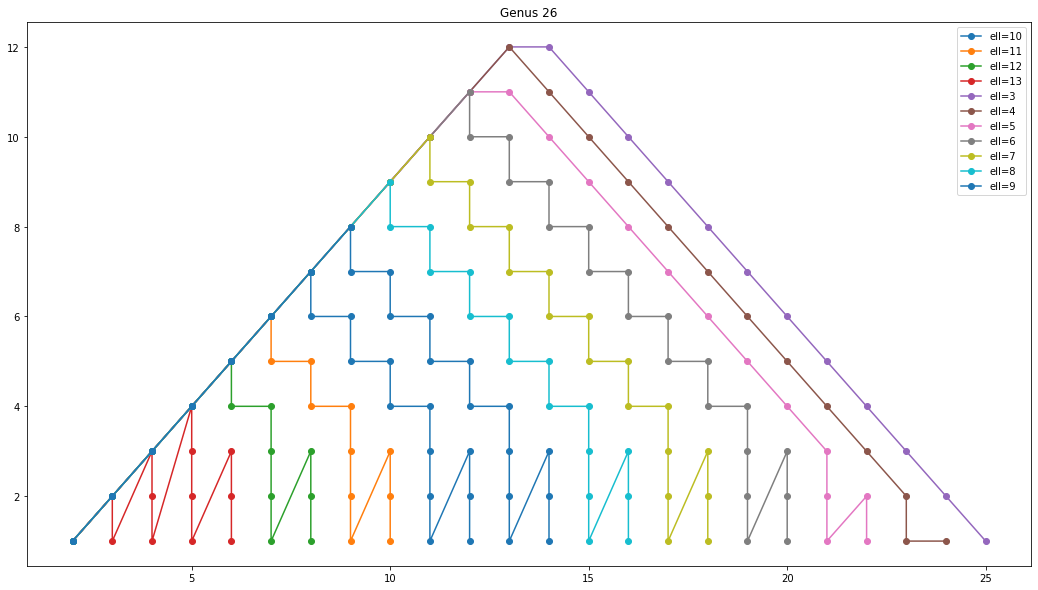

In [6]:
#Read data from CSV file and plot it
import csv
read_g =26
data_from_csv=[]

try:
    with open('g'+str(read_g)+'k3.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
              data_from_csv.append(dict(row))
except IOError:
    print("I/O error")

plot_data(data_from_csv)